# This notebook does a few things:
    
- imports data from the census
    - for demographic data (note that rn the API call doesn't do much, but it is very simple to change) The packages `census` and `states` format our web requests which makes the process very easy for us. Small issue that I haven't been able to track down a list of codes for our info, so pop. data is non-existant. this should not be a hard fix
    - for shape files this is the is the `tract_shapes` dataframe which is very useful. it will likely be the most granular location data we use. also, `school_shapes` dataframe, we will use it to get some info about the current system, and then it will be very useless.
- imports current school districts and concatanates them with the tracts. this combo is not that useful, but i wanted to see how much they lined up. the answer is basically not at all. I also made the `dist_tracts` dataframe which takes all the individual areas of intersection. I think we should stick to either tracts or block groups because this wierd combo will make getting info very hard.
- imports data from NEICES (this is likely not the actual abreviation) which gives us location and population of every single school
- in the next 2h I will hopefull aggregate schools with tracts and this will all become much more functional. 
# Before you run:
- make sure you have all the dependendencies i refer to (including `descartes` which is not listed but is an implicit geopandas dependency)
- Places which say `PATH` require: get the path of this file on your own computer and put it in place of that string (this won't run until you replace all of these, there are 3)

In [ ]:
from census import Census
from us import states
import pandas as pd
import geopandas as gpd
c = Census("3adb5b5d1ccdb4efb28600c50c1a5d2e2b0c720f")
geodf = pd.DataFrame.from_dict(c.sf1.get('NAME', geo={'for': 'tract:*',
                       'in': 'state:{}'.format(states.PA.fips)}))

In [194]:
PATH_tracts = '/Users/zoeshleifer/promys2020/lab/pa_tracts'
PATH_schools = '/Users/zoeshleifer/promys2020/lab/pa_schools'
tract_shapes = gpd.read_file(PATH_tracts).set_index('TRACTCE10')
school_shapes = gpd.read_file(PATH_schools).set_index('GEOID10')

In [195]:
PATH_hs = '/Users/zoeshleifer/promys2020/lab/Public_Schools'
hs_shapes = gpd.read_file(PATH_hs)

In [193]:
hsg = hs_shapes.groupby('STATE')
hs = hsg.get_group('PA').set_index('NCESID')

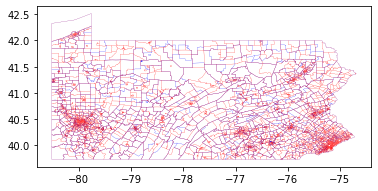

In [148]:
ax = school_shapes.plot(linewidth=.1,edgecolor='blue', color='none')
tract_shapes.plot(ax =ax,linewidth=.1,edgecolor='red', color='none')

The calculation in the next cell takes a while, so you only want to do it once. For this reason, the cell underneath copies into a dataframe called `dist_tracts`. I will mess around with that so we are not mutating the original which is annoying to reproduce

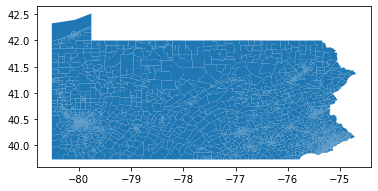

In [167]:
res_intersection = gpd.overlay(school_shapes, tract_shapes, how='intersection')
res_intersection.plot()

In [192]:
dist_tracts = res_intersection